<a href="https://colab.research.google.com/github/VincentZuo/fin-models/blob/main/%5BFinal%5D_V15_torch_fake_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up and read data

In [ ]:
!pip install transformers==4.17.0
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.8 MB 4.2 MB/s 
     |████████████████████████████████| 880 kB 63.6 MB/s 
     |████████████████████████████████| 596 kB 49.5 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
     |████████████████████████████████| 6.6 MB 65.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=afde198303197357ccb755955ce235f092d2c5c892547b128de8f13949665567
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.5 MB/s 
     |███████

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import torch
import transformers
print(transformers.__version__)
print(torch.__version__)

4.17.0
1.11.0+cu113


In [ ]:
import sys
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
read_df = pd.read_pickle("/content/gdrive/MyDrive/224U_2022/final_project_data.pkl")

In [ ]:
read_df.head()

,title,label,range,emb
0,Joseph Greenberg,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","(0, 106)","[[-0.07557425, -0.011484241, -0.07807306, 0.00..."
1,Pauline Donalda,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","(106, 127)","[[-0.057122264, 0.005889078, -0.030671664, -0...."
2,List of German football transfers summer 2017,"[0, 0, 1, 0, 0]","(127, 132)","[[-0.0032938644, -0.02310217, -0.05397396, -0...."
3,Lester Hudson,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, ...","(132, 176)","[[-0.0091192825, 0.090078354, -0.029187214, -0..."
4,Monique Ganderton,"[1, 0, 0, 0, 0, 1, 0]","(176, 183)","[[-0.090651, -0.09176681, -0.029592248, -0.062..."


In [ ]:
read_df = read_df.sample(frac=1)
read_df.head()

,title,label,range,emb
464,Joculator furvus,"[0, 0]","(8677, 8679)","[[0.0015400741, 0.1169758, 0.04495331, 0.01990..."
692,Walter Beadsmoore,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]","(14023, 14034)","[[0.013592325, -0.011730552, -0.060790822, -0...."
758,SMS S50,"[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...","(17869, 17911)","[[-0.0896468, 0.048542354, -0.062286995, -0.02..."
738,Brouwerij De Molen,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, ...","(15096, 15120)","[[0.050399173, -0.003195621, -0.08526476, 0.01..."
239,National Geographic Traveler,"[0, 0, 0, 1, 0, 0, 1, 1, 0, 0]","(5997, 6007)","[[0.08931622, 0.005438333, -0.036838, 0.096131..."


In [ ]:
MAX_SEQ_LENGTH = 128

In [ ]:
from sentence_transformers import SentenceTransformer
#Define the model
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
start_sentence = sentence_model.encode(['<s>'])
end_sentence = sentence_model.encode(['</s>'])
pad_sentence = sentence_model.encode(['<PAD>'])

start_index = 2
end_index = 3
pad_index = 4
MAX_SEQ_LENGTH=128

label_list = [0, 1, 2, 3, 4]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(pad_sentence.shape)
print(np.repeat(pad_sentence, 3, axis=0).shape)

(1, 384)
(3, 384)


In [ ]:
def pad_emb_and_label(current_emb, current_label, seq_len):
  mask = [True] * seq_len
  if len(current_emb) > seq_len-2:
    emb =  np.concatenate([start_sentence, current_emb[0:seq_len-2], end_sentence], axis=0)
    label = np.concatenate([[2], current_label[0:seq_len-2], [3]], axis=0)
    return emb, np.array(label, dtype='int64'), np.array(mask, dtype='bool')
  remainder = seq_len - len(current_emb) -2
  emb =  np.concatenate([start_sentence, current_emb, end_sentence, np.repeat(pad_sentence, remainder, axis=0)], axis=0)
  label = np.concatenate([ [2], current_label, [3], [4]*remainder ], axis=0)
  mask = [True] * (seq_len - remainder) + [False] * remainder
  return emb, np.array(label, dtype='int64'), np.array(mask, dtype='bool')

In [ ]:
current_emb_test = torch.rand(2, 384)
current_lb_test = torch.rand(2).int()
pad_emb_and_label(current_emb_test, current_lb_test, 6)

(array([[-4.4062074e-02,  3.8383719e-02,  4.8404066e-03, ...,
          3.1103401e-02,  1.5919406e-02,  7.0297201e-03],
        [ 4.3809837e-01,  2.8005159e-01,  3.8965899e-01, ...,
          3.8355541e-01,  7.8542054e-02,  7.5269562e-01],
        [ 6.3040078e-01,  6.7451000e-01,  6.5770209e-01, ...,
          7.0885003e-02,  9.2919886e-01,  7.1819288e-01],
        [-7.0660561e-02,  5.0418653e-02,  2.2698086e-02, ...,
          8.2758099e-02,  8.3503779e-04, -4.8372149e-03],
        [-1.2105960e-02, -2.5002258e-02, -5.4780357e-02, ...,
          9.6640773e-02, -2.8255633e-03,  4.8255362e-03],
        [-1.2105960e-02, -2.5002258e-02, -5.4780357e-02, ...,
          9.6640773e-02, -2.8255633e-03,  4.8255362e-03]], dtype=float32),
 array([2, 0, 0, 3, 4, 4]),
 array([ True,  True,  True,  True, False, False]))

In [ ]:
from torch.utils.data import Dataset

class WikiPandasDfDataSet(Dataset):
  def __init__(self, input_df):
    self.pandas_df = input_df

  def __getitem__(self, index):
    seq = np.array(self.pandas_df.iloc[index]["emb"], dtype='double')
    label = np.array(self.pandas_df.iloc[index]["label"], dtype='double')
    return seq, label

  def __len__(self):
      return len(self.pandas_df)

def collate_fn(batch):
    batched_seq = []
    batched_label = []
    batched_mask = []
    for seqs, labels in batch:
      try:
        local_emb, local_label, local_mask = pad_emb_and_label(seqs, labels, MAX_SEQ_LENGTH)
        batched_seq.append(local_emb)
        batched_label.append(local_label)
        batched_mask.append(local_mask)
      except Exception as e:
        print("collate_fn err:", e)
        continue
    return torch.tensor(batched_seq).float(), torch.tensor(batched_label), torch.tensor(batched_mask).bool()

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE_TRAIN = 32

dataset_train = WikiPandasDfDataSet(read_df.head(6400))
train_dataloader = DataLoader(dataset_train, batch_size=BATCH_SIZE_TRAIN, collate_fn = collate_fn, shuffle=True, drop_last=True)
dataset_val = WikiPandasDfDataSet(read_df.tail(3200))
val_dataloader = DataLoader(dataset_val, batch_size=BATCH_SIZE_TRAIN, collate_fn = collate_fn, shuffle=False, drop_last=True)

# NN Model code

In [ ]:
import torch.nn as nn
import datetime
from torch.nn import TransformerEncoderLayer
import math

In [ ]:
def _scaled_dot_product_attention(q, k, v):
    B, Nt, E = q.shape
    q = q / math.sqrt(E)
    # (B, Nt, E) x (B, E, Ns) -> (B, Nt, Ns)
    attn = torch.bmm(q, k.transpose(-2, -1))
    attn = attn.softmax(dim=-1)
    # (B, Nt, Ns) x (B, Ns, E) -> (B, Nt, E)
    output = torch.bmm(attn, v)
    return output, attn

In [ ]:
class AttentionModel(nn.Module):
  def __init__(self, nhead=4, emb_dim=384):
    super().__init__()
    self.transformer_encoder = TransformerEncoderLayer(d_model=emb_dim, nhead=nhead)

  def forward(self, seq_input):
    return self.transformer_encoder(seq_input)

class MlpGenerator(nn.Module):
    def __init__(self, noise_length, seq_length, hidden_sizes=[512], dropout_rate=0.1):
        super(MlpGenerator, self).__init__()
        self.seq_length = seq_length
        layers = []
        hidden_sizes = [noise_length] + hidden_sizes + [seq_length]
        for i in range(len(hidden_sizes)-1):
            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])
        self.layers = nn.Sequential(*layers)

    def forward(self, noise, seq_input):
        q = self.layers(noise)
        output, _ = _scaled_dot_product_attention(q, q, seq_input)
        return output

class LstmDiscriminatorModel(nn.Module):
  def __init__(self, hidden_dim, nhead=4, emb_dim=384):
    super().__init__()
    self.hidden_dim = hidden_dim
    self.lstm = nn.LSTM(emb_dim, self.hidden_dim, batch_first=True, bidirectional=True)
    self.linear_layer = nn.Linear(self.hidden_dim*2, 5)
    self.adv_layer = nn.Linear(self.hidden_dim*2, 1)
    self.softmax = nn.LogSoftmax(dim=1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, seq_input):
    outputs, (hn, cn) = self.lstm(seq_input)
    linear_output = self.linear_layer(outputs)
    adv_output = self.sigmoid(self.adv_layer(torch.reshape(hn, [outputs.shape[0], 2*self.hidden_dim])))
    return self.softmax(linear_output), adv_output

In [ ]:
test_noise_length = 512
test_seq_length = 128
test_batch_size= 7
test_hidden_size = 256
test_criterion = torch.nn.BCELoss()

fake_seqs_batches = torch.rand(test_batch_size, test_seq_length, 384)
fake_lbs_batches = torch.randint(2, (test_batch_size, test_seq_length))
noise_test = torch.zeros(fake_seqs_batches.shape[0], test_seq_length, test_noise_length).uniform_(0, 1)

model_test_ = AttentionModel()
gen_test_ = MlpGenerator(test_noise_length, seq_length=test_seq_length)
disc_test = LstmDiscriminatorModel(hidden_dim=test_hidden_size)

test_vec_post_model = model_test_(fake_seqs_batches)
test_vec_post_disc, test_adv_post_disc = disc_test(test_vec_post_model)
print(test_vec_post_disc.shape, test_adv_post_disc.shape)

test_vec_post_gen = gen_test_(noise_test, fake_seqs_batches)
test_vec_post_disc, test_gen_adv_post_disc = disc_test(test_vec_post_gen)
print(test_vec_post_disc.shape, test_gen_adv_post_disc.shape)

test_unsupervised_labels = torch.Tensor([1, 0]).to(torch.float32).repeat(test_batch_size, 1)
test_unsp_pred = torch.concat([test_adv_post_disc, test_gen_adv_post_disc], dim=1)
print(test_unsp_pred)
test_criterion(test_unsp_pred, test_unsupervised_labels)

torch.Size([7, 128, 5]) torch.Size([7, 1])
torch.Size([7, 128, 5]) torch.Size([7, 1])
tensor([[0.4445, 0.4734],
        [0.4722, 0.4718],
        [0.4685, 0.4716],
        [0.4757, 0.4298],
        [0.5224, 0.4745],
        [0.5348, 0.4751],
        [0.5235, 0.4748]], grad_fn=<CatBackward0>)


tensor(0.6712, grad_fn=<BinaryCrossEntropyBackward0>)

# Training loop code

In [ ]:
from tqdm import tqdm
from transformers import AdamW
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
LEARING_RATE = 0.001
HIDDEN_DIM_SIZE = 256
NUM_EPOCS = 10
NOISE_LENGTH = 64

attn_model_ = AttentionModel()
gen_model_ = MlpGenerator(noise_length=NOISE_LENGTH, seq_length=MAX_SEQ_LENGTH)
disc_model_ = LstmDiscriminatorModel(hidden_dim=HIDDEN_DIM_SIZE)

attn_model_.to(device)
gen_model_.to(device)
disc_model_.to(device)

attn_opt = AdamW(attn_model_.parameters(),lr = LEARING_RATE)
gen_opt = AdamW(gen_model_.parameters(),lr = LEARING_RATE)
disc_opt = AdamW(disc_model_.parameters(),lr = LEARING_RATE)

train_losses = []
valid_losses = []
accuracy_list = []
f1_list = []

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
def reshape_for_loss(preds, labels):
  preds_reshape = torch.reshape(preds, [preds.shape[0] * preds.shape[1], preds.shape[2]])
  labels_reshape = torch.reshape(labels, [labels.shape[0] * preds.shape[1]])
  return preds_reshape, labels_reshape


def train(train_dataloader, noise_length=64):
  attn_model_.train()
  gen_model_.train()
  disc_model_.train()
  sup_loss, unsup_loss = 0, 0
  step = 0
  criterion = torch.nn.CrossEntropyLoss(ignore_index=4)
  adv_criterion = torch.nn.BCELoss()

  # iterate over batches
  for batch in tqdm(train_dataloader):
      sequences, labels, mask = batch[0].to(device), batch[1].to(device), batch[2].to(device)

      attn_model_.zero_grad()        
      gen_model_.zero_grad()        
      disc_model_.zero_grad()        

      real_post_model = attn_model_(sequences)
      real_post_disc, real_adv = disc_model_(real_post_model)

      noise_batch = torch.zeros(sequences.shape[0], sequences.shape[1], noise_length).uniform_(0, 1).to(device)
      fake_post_gen = gen_model_(noise_batch, sequences)
      fake_post_disc, fake_adv = disc_model_(fake_post_gen)

      resh_pred, resh_label = reshape_for_loss(real_post_disc, labels)
      supervised_loss = criterion(resh_pred.to(device), resh_label.to(torch.int64).to(device))

      unsupervised_labels = torch.Tensor([1, 0]).to(torch.float32).repeat(sequences.shape[0], 1)
      unsupervised_predictions = torch.concat([real_adv, fake_adv], dim=1).to(torch.float32)
      unsupervised_loss = adv_criterion(unsupervised_predictions.to(device), unsupervised_labels.to(device))

      attn_opt.zero_grad()
      gen_opt.zero_grad()
      disc_opt.zero_grad()

      supervised_loss.backward(retain_graph=True)
      unsupervised_loss.backward()

      torch.nn.utils.clip_grad_norm_(gen_model_.parameters(), 1.0)
      torch.nn.utils.clip_grad_norm_(disc_model_.parameters(), 1.0)
      torch.nn.utils.clip_grad_norm_(attn_model_.parameters(), 1.0)

      attn_opt.step()
      gen_opt.step()
      disc_opt.step()
      
      sup_loss += supervised_loss.item()
      unsup_loss += unsupervised_loss.item()
      # progress update after every 100 batches.
      if step % 50 == 0 and not step == 0:
          print('Step', step, " of ",len(train_dataloader), " sup loss:" , supervised_loss.item(), "unsup loss" , unsupervised_loss.item())
          torch.cuda.empty_cache()
      step+=1
  # avg_train loss
  return sup_loss/ step, unsup_loss/ step

def evaluate(dev_dataloader):
  print("\nEvaluating...")
  # deactivate dropout layers
  attn_model_.eval()
  disc_model_.eval()
  sup_loss = 0
  eval_preds = []
  eval_labels = []
  curr_examples = 0
  criterion = torch.nn.CrossEntropyLoss(ignore_index=4)
  # iterate over batches
  step = 0
  for batch in tqdm(dev_dataloader):
    sequences, labels, mask = batch[0].to(device), batch[1].to(device), batch[2].to(device)
    curr_examples += len(labels)
    # deactivate autograd
    with torch.no_grad():
    # model predictions
        preds, _ = disc_model_(attn_model_(sequences))
        preds_reshape = torch.reshape(preds, [preds.shape[0] * preds.shape[1], preds.shape[2]])
        labels_reshape = torch.reshape(labels, [labels.shape[0] * preds.shape[1]])
        loss = criterion(preds_reshape, labels_reshape.to(torch.int64))
        sup_loss += loss.item()
        eval_preds += torch.argmax(preds.detach().cpu(), dim=-1).numpy().flatten().tolist()
        eval_labels += labels.detach().cpu().numpy().flatten().tolist()
    step+=1
  # compute the validation loss of the epoch
  avg_loss = sup_loss / step 

  return avg_loss, eval_preds, eval_labels

In [ ]:
for epoch in range(NUM_EPOCS):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, NUM_EPOCS))
    
    #train model
    train_loss = train(train_dataloader)
    
    #evaluate model
    valid_loss, e_pred, e_label = evaluate(val_dataloader)

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    # accuracy_list.append(accuracy)
    # f1_list.append(valid_f1)

    print('Train loss:', train_loss, 'Val loss:', valid_loss)

    for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
      labels_bool = [ elem > 0 for elem in e_label]
      preds_bool = [elem > threshold for elem in e_pred]
      accuracy = accuracy_score(labels_bool, preds_bool)
      valid_f1 = f1_score(labels_bool, preds_bool,average="macro")
      print('Threshold:', threshold,'Accuracy:', accuracy, 'F1:', valid_f1)



 Epoch 1 / 10


 26%|██▌       | 51/200 [00:14<00:40,  3.64it/s]

Step 50  of  200  sup loss: 0.5512852668762207 unsup loss 0.00047328334767371416


 50%|█████     | 101/200 [00:28<00:27,  3.60it/s]

Step 100  of  200  sup loss: 0.5690705180168152 unsup loss 0.00022223997802939266


 76%|███████▌  | 151/200 [00:41<00:13,  3.58it/s]

Step 150  of  200  sup loss: 0.4827108085155487 unsup loss 0.00017373476293869317


100%|██████████| 200/200 [00:55<00:00,  3.62it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.10it/s]


Train loss: (0.5756136918067932, 0.025656142679508775) Val loss: 0.5067609465122223
Threshold: 0.1 Accuracy: 0.95604736328125 F1: 0.8869123830478229
Threshold: 0.2 Accuracy: 0.95604736328125 F1: 0.8869123830478229
Threshold: 0.3 Accuracy: 0.95604736328125 F1: 0.8869123830478229
Threshold: 0.4 Accuracy: 0.95604736328125 F1: 0.8869123830478229
Threshold: 0.5 Accuracy: 0.95604736328125 F1: 0.8869123830478229
Threshold: 0.6 Accuracy: 0.95604736328125 F1: 0.8869123830478229

 Epoch 2 / 10


 26%|██▌       | 51/200 [00:13<00:41,  3.62it/s]

Step 50  of  200  sup loss: 0.5308746695518494 unsup loss 0.0001203836509375833


 50%|█████     | 101/200 [00:27<00:27,  3.57it/s]

Step 100  of  200  sup loss: 0.4675051271915436 unsup loss 6.756365473847836e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.59it/s]

Step 150  of  200  sup loss: 0.4779018759727478 unsup loss 8.597559644840658e-05


100%|██████████| 200/200 [00:54<00:00,  3.65it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.10it/s]


Train loss: (0.4974444755911827, 9.113772910495754e-05) Val loss: 0.4791328769922256
Threshold: 0.1 Accuracy: 0.95795166015625 F1: 0.8849737521244652
Threshold: 0.2 Accuracy: 0.95795166015625 F1: 0.8849737521244652
Threshold: 0.3 Accuracy: 0.95795166015625 F1: 0.8849737521244652
Threshold: 0.4 Accuracy: 0.95795166015625 F1: 0.8849737521244652
Threshold: 0.5 Accuracy: 0.95795166015625 F1: 0.8849737521244652
Threshold: 0.6 Accuracy: 0.95795166015625 F1: 0.8849737521244652

 Epoch 3 / 10


 26%|██▌       | 51/200 [00:13<00:41,  3.62it/s]

Step 50  of  200  sup loss: 0.4781155586242676 unsup loss 0.0001870216801762581


 50%|█████     | 101/200 [00:27<00:27,  3.61it/s]

Step 100  of  200  sup loss: 0.4513152241706848 unsup loss 0.0001432636781828478


 76%|███████▌  | 151/200 [00:41<00:13,  3.62it/s]

Step 150  of  200  sup loss: 0.4378555715084076 unsup loss 8.8381944806315e-05


100%|██████████| 200/200 [00:54<00:00,  3.65it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.13it/s]


Train loss: (0.4675532253086567, 0.013653610472938454) Val loss: 0.48384864777326586
Threshold: 0.1 Accuracy: 0.9567431640625 F1: 0.8871732414899833
Threshold: 0.2 Accuracy: 0.9567431640625 F1: 0.8871732414899833
Threshold: 0.3 Accuracy: 0.9567431640625 F1: 0.8871732414899833
Threshold: 0.4 Accuracy: 0.9567431640625 F1: 0.8871732414899833
Threshold: 0.5 Accuracy: 0.9567431640625 F1: 0.8871732414899833
Threshold: 0.6 Accuracy: 0.9567431640625 F1: 0.8871732414899833

 Epoch 4 / 10


 26%|██▌       | 51/200 [00:13<00:41,  3.61it/s]

Step 50  of  200  sup loss: 0.47213518619537354 unsup loss 4.1900933865690604e-05


 50%|█████     | 101/200 [00:27<00:27,  3.59it/s]

Step 100  of  200  sup loss: 0.4134657680988312 unsup loss 3.891811502398923e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.59it/s]

Step 150  of  200  sup loss: 0.39206451177597046 unsup loss 2.5796143745537847e-05


100%|██████████| 200/200 [00:54<00:00,  3.65it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  7.82it/s]


Train loss: (0.4356255565583706, 4.951838369379402e-05) Val loss: 0.47823810338974
Threshold: 0.1 Accuracy: 0.94373291015625 F1: 0.8499547860376866
Threshold: 0.2 Accuracy: 0.94373291015625 F1: 0.8499547860376866
Threshold: 0.3 Accuracy: 0.94373291015625 F1: 0.8499547860376866
Threshold: 0.4 Accuracy: 0.94373291015625 F1: 0.8499547860376866
Threshold: 0.5 Accuracy: 0.94373291015625 F1: 0.8499547860376866
Threshold: 0.6 Accuracy: 0.94373291015625 F1: 0.8499547860376866

 Epoch 5 / 10


 26%|██▌       | 51/200 [00:14<00:44,  3.33it/s]

Step 50  of  200  sup loss: 0.35351189970970154 unsup loss 2.4167264200514182e-05


 50%|█████     | 101/200 [00:27<00:27,  3.61it/s]

Step 100  of  200  sup loss: 0.4367920160293579 unsup loss 4.653691576095298e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.60it/s]

Step 150  of  200  sup loss: 0.4736190140247345 unsup loss 2.814532126649283e-05


100%|██████████| 200/200 [00:55<00:00,  3.63it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.09it/s]


Train loss: (0.4016888552904129, 4.330061724431289e-05) Val loss: 0.47494640231132507
Threshold: 0.1 Accuracy: 0.85205322265625 F1: 0.7178498253379673
Threshold: 0.2 Accuracy: 0.85205322265625 F1: 0.7178498253379673
Threshold: 0.3 Accuracy: 0.85205322265625 F1: 0.7178498253379673
Threshold: 0.4 Accuracy: 0.85205322265625 F1: 0.7178498253379673
Threshold: 0.5 Accuracy: 0.85205322265625 F1: 0.7178498253379673
Threshold: 0.6 Accuracy: 0.85205322265625 F1: 0.7178498253379673

 Epoch 6 / 10


 26%|██▌       | 51/200 [00:13<00:41,  3.61it/s]

Step 50  of  200  sup loss: 0.3009963035583496 unsup loss 3.399690467631444e-05


 50%|█████     | 101/200 [00:27<00:27,  3.59it/s]

Step 100  of  200  sup loss: 0.4029746651649475 unsup loss 4.2932788346661255e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.61it/s]

Step 150  of  200  sup loss: 0.37438371777534485 unsup loss 1.459491795685608e-05


100%|██████████| 200/200 [00:54<00:00,  3.65it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.00it/s]


Train loss: (0.36455465368926526, 2.8863765655842145e-05) Val loss: 0.49678874254226685
Threshold: 0.1 Accuracy: 0.94919921875 F1: 0.8609938464209826
Threshold: 0.2 Accuracy: 0.94919921875 F1: 0.8609938464209826
Threshold: 0.3 Accuracy: 0.94919921875 F1: 0.8609938464209826
Threshold: 0.4 Accuracy: 0.94919921875 F1: 0.8609938464209826
Threshold: 0.5 Accuracy: 0.94919921875 F1: 0.8609938464209826
Threshold: 0.6 Accuracy: 0.94919921875 F1: 0.8609938464209826

 Epoch 7 / 10


 26%|██▌       | 51/200 [00:13<00:41,  3.62it/s]

Step 50  of  200  sup loss: 0.31086236238479614 unsup loss 1.3676632079295814e-05


 50%|█████     | 101/200 [00:27<00:27,  3.65it/s]

Step 100  of  200  sup loss: 0.29918527603149414 unsup loss 1.8388735043117777e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.62it/s]

Step 150  of  200  sup loss: 0.3536894917488098 unsup loss 1.37688093673205e-05


100%|██████████| 200/200 [00:54<00:00,  3.66it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.10it/s]


Train loss: (0.3252555713802576, 2.4785236350908236e-05) Val loss: 0.5186921560764313
Threshold: 0.1 Accuracy: 0.9548828125 F1: 0.8753421717491008
Threshold: 0.2 Accuracy: 0.9548828125 F1: 0.8753421717491008
Threshold: 0.3 Accuracy: 0.9548828125 F1: 0.8753421717491008
Threshold: 0.4 Accuracy: 0.9548828125 F1: 0.8753421717491008
Threshold: 0.5 Accuracy: 0.9548828125 F1: 0.8753421717491008
Threshold: 0.6 Accuracy: 0.9548828125 F1: 0.8753421717491008

 Epoch 8 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.62it/s]

Step 50  of  200  sup loss: 0.2219037264585495 unsup loss 1.660228917899076e-05


 50%|█████     | 101/200 [00:28<00:27,  3.63it/s]

Step 100  of  200  sup loss: 0.28887835144996643 unsup loss 1.6018710084608756e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.61it/s]

Step 150  of  200  sup loss: 0.28366369009017944 unsup loss 1.0858377208933234e-05


100%|██████████| 200/200 [00:55<00:00,  3.62it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.00it/s]


Train loss: (0.2783217755705118, 1.7875975554488833e-05) Val loss: 0.5401508834958076
Threshold: 0.1 Accuracy: 0.9528369140625 F1: 0.8678950100744904
Threshold: 0.2 Accuracy: 0.9528369140625 F1: 0.8678950100744904
Threshold: 0.3 Accuracy: 0.9528369140625 F1: 0.8678950100744904
Threshold: 0.4 Accuracy: 0.9528369140625 F1: 0.8678950100744904
Threshold: 0.5 Accuracy: 0.9528369140625 F1: 0.8678950100744904
Threshold: 0.6 Accuracy: 0.9528369140625 F1: 0.8678950100744904

 Epoch 9 / 10


 26%|██▌       | 51/200 [00:13<00:41,  3.61it/s]

Step 50  of  200  sup loss: 0.2656327486038208 unsup loss 2.0512641640380025e-05


 50%|█████     | 101/200 [00:27<00:27,  3.62it/s]

Step 100  of  200  sup loss: 0.2784046530723572 unsup loss 1.7064354324247688e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.62it/s]

Step 150  of  200  sup loss: 0.2113143354654312 unsup loss 1.2468904969864525e-05


100%|██████████| 200/200 [00:54<00:00,  3.66it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.06it/s]


Train loss: (0.2377396474033594, 1.6885886848285735e-05) Val loss: 0.6075772094726563
Threshold: 0.1 Accuracy: 0.951201171875 F1: 0.8664518904368934
Threshold: 0.2 Accuracy: 0.951201171875 F1: 0.8664518904368934
Threshold: 0.3 Accuracy: 0.951201171875 F1: 0.8664518904368934
Threshold: 0.4 Accuracy: 0.951201171875 F1: 0.8664518904368934
Threshold: 0.5 Accuracy: 0.951201171875 F1: 0.8664518904368934
Threshold: 0.6 Accuracy: 0.951201171875 F1: 0.8664518904368934

 Epoch 10 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.62it/s]

Step 50  of  200  sup loss: 0.18260444700717926 unsup loss 1.1225751222809777e-05


 50%|█████     | 101/200 [00:27<00:27,  3.62it/s]

Step 100  of  200  sup loss: 0.20826706290245056 unsup loss 8.176133633241989e-06


 76%|███████▌  | 151/200 [00:41<00:13,  3.62it/s]

Step 150  of  200  sup loss: 0.2432556301355362 unsup loss 9.561219485476613e-06


100%|██████████| 200/200 [00:54<00:00,  3.65it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.09it/s]


Train loss: (0.19670279581099748, 1.178411800538015e-05) Val loss: 0.7003498774766922
Threshold: 0.1 Accuracy: 0.94746826171875 F1: 0.8561088583533445
Threshold: 0.2 Accuracy: 0.94746826171875 F1: 0.8561088583533445
Threshold: 0.3 Accuracy: 0.94746826171875 F1: 0.8561088583533445
Threshold: 0.4 Accuracy: 0.94746826171875 F1: 0.8561088583533445
Threshold: 0.5 Accuracy: 0.94746826171875 F1: 0.8561088583533445
Threshold: 0.6 Accuracy: 0.94746826171875 F1: 0.8561088583533445


In [ ]:
print(train_losses)

[(0.5756136918067932, 0.025656142679508775), (0.4974444755911827, 9.113772910495754e-05), (0.4675532253086567, 0.013653610472938454), (0.4356255565583706, 4.951838369379402e-05), (0.4016888552904129, 4.330061724431289e-05), (0.36455465368926526, 2.8863765655842145e-05), (0.3252555713802576, 2.4785236350908236e-05), (0.2783217755705118, 1.7875975554488833e-05), (0.2377396474033594, 1.6885886848285735e-05), (0.19670279581099748, 1.178411800538015e-05)]


In [ ]:
sup_train_losses = [item[0] for item in train_losses]
unsup_train_losses = [item[1] for item in train_losses]
plot_df = pd.DataFrame(list(zip(sup_train_losses, valid_losses, unsup_train_losses)),
               columns =['train', 'validation', 'unsup'])

In [ ]:
plot_df

,train,validation,unsup
0,0.575614,0.506761,0.025656
1,0.497444,0.479133,0.000091
2,0.467553,0.483849,0.013654
3,0.435626,0.478238,0.000050
4,0.401689,0.474946,0.000043
5,0.364555,0.496789,0.000029
6,0.325256,0.518692,0.000025
7,0.278322,0.540151,0.000018
8,0.237740,0.607577,0.000017
9,0.196703,0.700350,0.000012


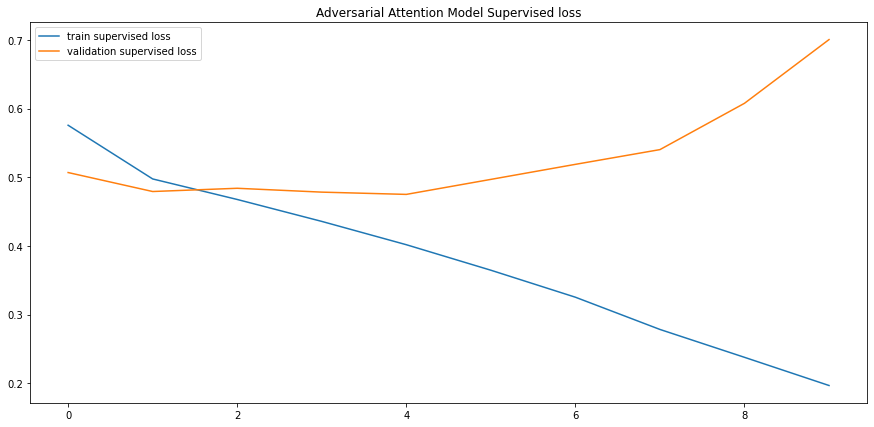

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
(plot_df['train']).plot(label = 'train supervised loss', figsize = (15,7))
(plot_df['validation']).plot(label = 'validation supervised loss', figsize = (15,7))
plt.title('Adversarial Attention Model Supervised loss')
plt.legend()

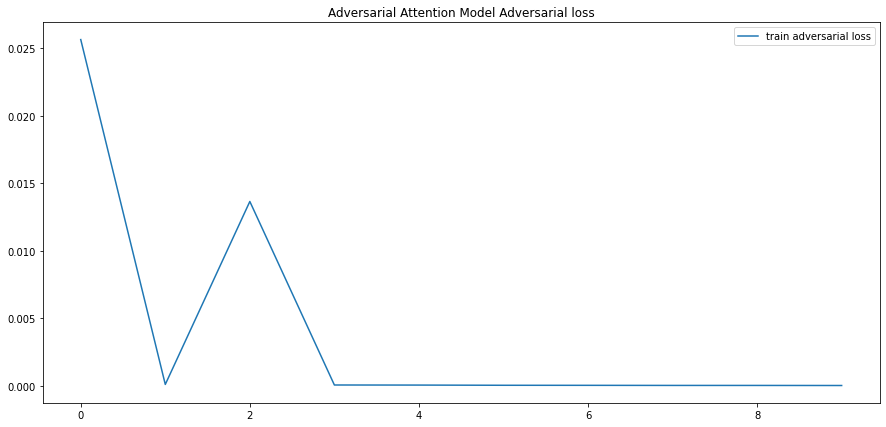

In [ ]:

%matplotlib inline
(plot_df['unsup']).plot(label = 'train adversarial loss', figsize = (15,7))
plt.title('Adversarial Attention Model Adversarial loss')
plt.legend()